In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-passenger-data-for-time-series-analysis/AirPassengers.csv


In [57]:
df = pd.read_csv('/kaggle/input/air-passenger-data-for-time-series-analysis/AirPassengers.csv')

In [58]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


Need to Convert Month into date formate

In [60]:
df['Month'] = pd.to_datetime(df['Month'])

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [62]:
df = df.set_index(['Month'])

In [63]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [64]:
import matplotlib.pyplot as plt

In [65]:
df.index.year

Int64Index([1949, 1949, 1949, 1949, 1949, 1949, 1949, 1949, 1949, 1949,
            ...
            1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960],
           dtype='int64', name='Month', length=144)

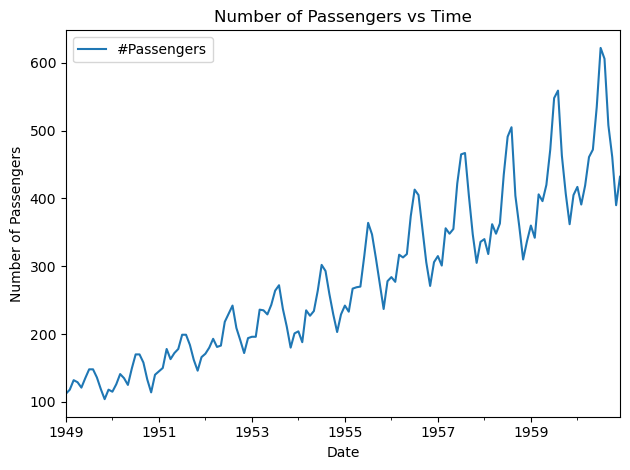

In [66]:
df.plot()
plt.title("Number of Passengers vs Time")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.tight_layout()
plt.show()

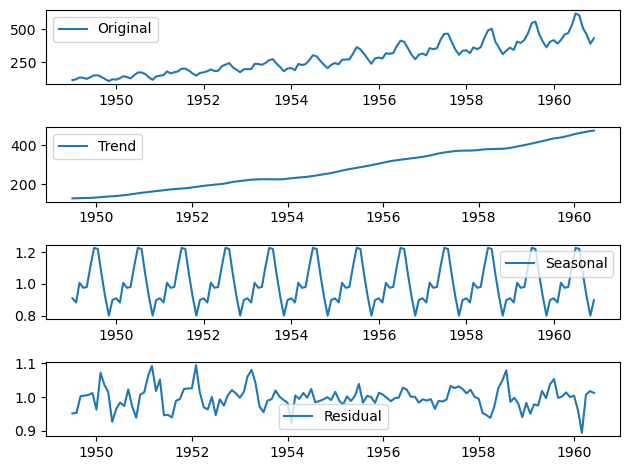

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposed = seasonal_decompose(df, model = 'multiplicative')

# Access the individual components
trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

# Plot the original time series
plt.subplot(411)
plt.plot(df, label='Original')
plt.legend()

# Plot the trend component
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()

# Plot the seasonal component
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend()

# Plot the residual component
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [69]:
import matplotlib.cm as cm

df['Month'] = df.index.month
df['Year'] = df.index.year

# Get unique years
years = df['Year'].unique()

# Create a colormap for the years
colors = cm.rainbow_r([i / len(years) for i in range(len(years))])

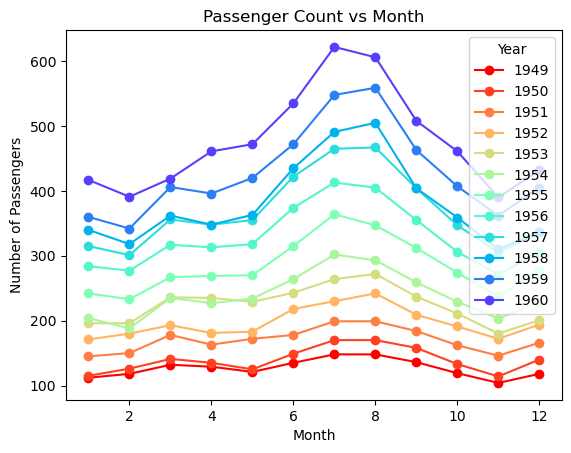

In [70]:
fig, ax = plt.subplots()

for year, color in zip(years, colors):
    data = df[df['Year'] == year]
    ax.plot(data['Month'], data['#Passengers'], label=str(year), color=color, marker='o')

ax.set_xlabel('Month')
ax.set_ylabel('Number of Passengers')
ax.set_title('Passenger Count vs Month')
ax.legend(title='Year')
plt.show()


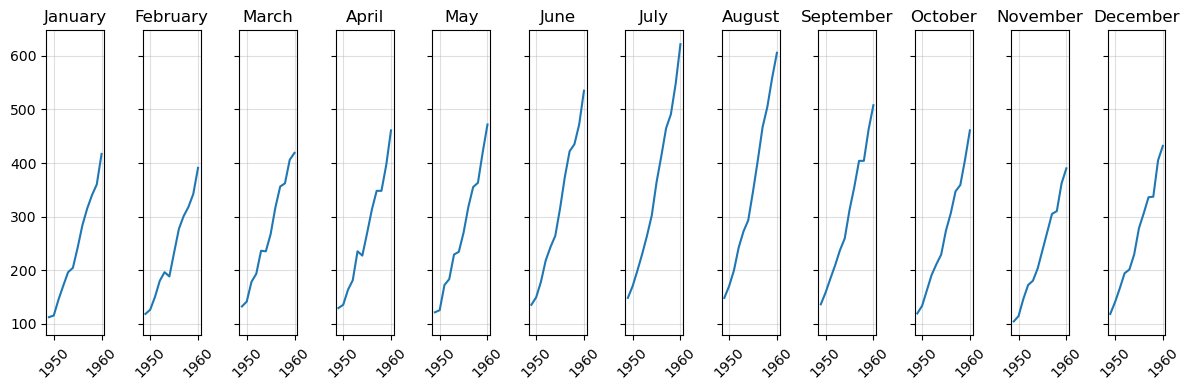

In [71]:
import calendar

fig, axes = plt.subplots(1, 12, figsize=(12, 4), sharey=True)
months = df['Month'].unique()

for i, month in enumerate(months):
    data = df[df['Month'] == month]
    ax = axes[i]
    ax.plot(data['Year'], data['#Passengers'])
    month_name = calendar.month_name[month]
    ax.set_title(month_name)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(alpha = 0.4)


plt.tight_layout()
plt.show()


In [72]:
df

,#Passengers,Month,Year
Month,,,
1949-01-01,112,1,1949
1949-02-01,118,2,1949
1949-03-01,132,3,1949
1949-04-01,129,4,1949
1949-05-01,121,5,1949
...,...,...,...
1960-08-01,606,8,1960
1960-09-01,508,9,1960
1960-10-01,461,10,1960


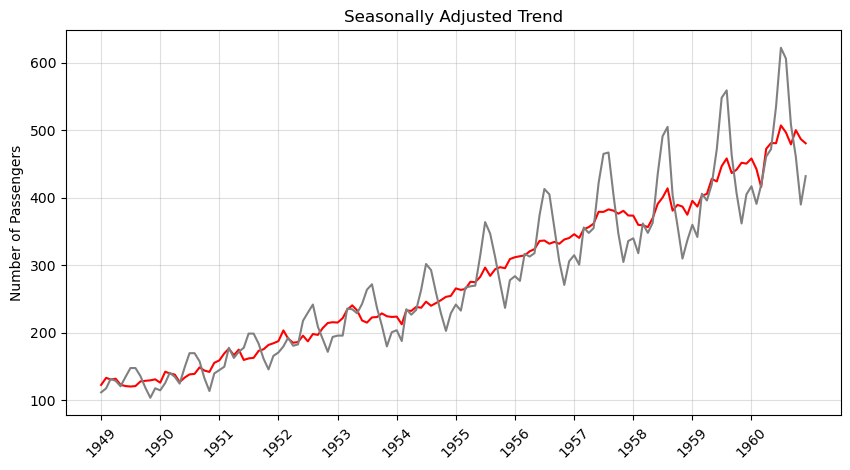

In [107]:
seasonally_adjusted_trend = df["#Passengers"] / seasonal

# Plot the seasonally adjusted trend
plt.figure(figsize=(10, 5))
plt.plot(seasonally_adjusted_trend, color = 'red', label = '')
plt.plot(df.index, df['#Passengers'], color='gray')

plt.ylabel('Number of Passengers')
plt.title('Seasonally Adjusted Trend')
plt.xticks( [str(year) for year in years.to_list()] , labels  = [str(year) for year in years.to_list()], rotation = 45)
plt.grid(alpha = 0.4)
plt.show()


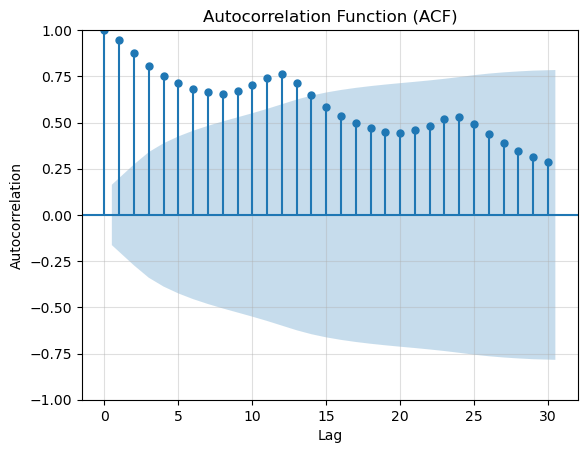

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Assuming you have a DataFrame 'df' with a time series column named 'Data'
data = df['#Passengers']

# Plot the ACF
plot_acf(data, lags=30)

plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.grid(alpha = 0.4)
plt.show()


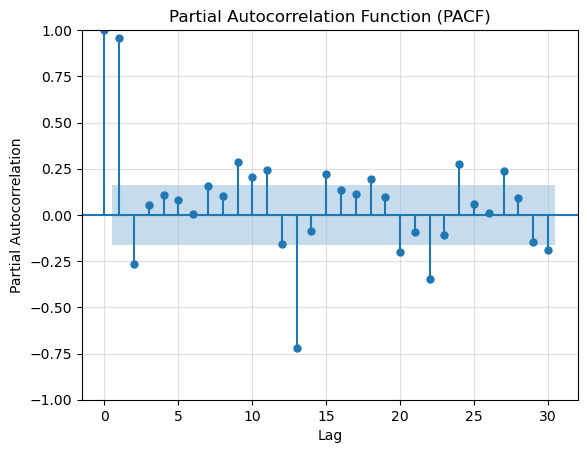

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Assuming you have a DataFrame 'df' with a time series column named 'Data'
data = df['#Passengers']

# Plot the ACF
plot_pacf(data, lags=30)

plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.grid(alpha = 0.4)
plt.show()
